# Imports and Setup

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import os
import math
import glob
import scipy
!pip install tensorflow_datasets
import tensorflow_datasets as tfds
!pip install xgboost

from csv import writer

from statistics import stdev

import pickle
import matplotlib.pyplot as plt

# Loading the Data

In [ ]:
filename = 'Data/75.pkl'

with open(filename, 'rb') as f:
    train_x, train_y, max_ABP = pickle.load(f)

In [ ]:
inputs = train_x
targets = train_y

In [ ]:
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])

In [ ]:
train_x.shape

(105443, 500)

In [ ]:
train_y.shape

(105443, 2)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.20, shuffle=True)

In [ ]:
test_y = test_y*max_ABP

# XGBoost Model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=100,
    reg_lambda=0.8, #0.8-1
    gamma=0, #0, 0.1, 0.2
    max_depth=7, #3-10 
)
model.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.8, ...)

# Relevant Plots

## Training

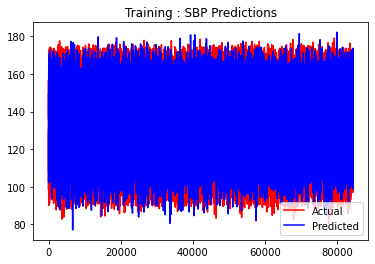

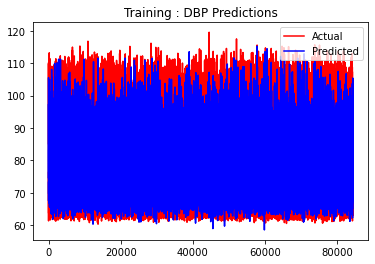

In [ ]:
train_predicted = model.predict(train_x)

plt.plot(train_y[:,0]*max_ABP, color='r', label = 'Actual')
plt.plot(train_predicted[:,0]*max_ABP, color='b', label = 'Predicted')
plt.legend()
plt.title('Training : SBP Predictions')

plt.show()

plt.plot(train_y[:,1]*max_ABP, color='r', label = 'Actual')
plt.plot(train_predicted[:,1]*max_ABP, color='b', label = 'Predicted')
plt.legend()
plt.title('Training : DBP Predictions')

plt.show()

## Testing

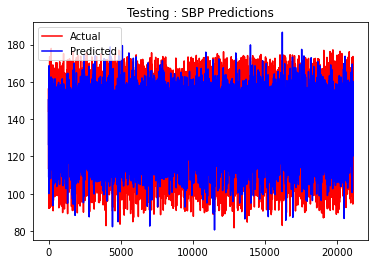

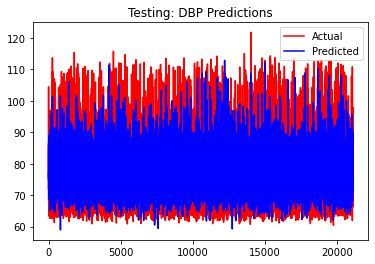

In [ ]:
test_predicted = model.predict(test_x)

plt.plot(test_y[:,0], color='r', label = 'Actual')
plt.plot(test_predicted[:,0]*max_ABP, color='b', label = 'Predicted')
plt.legend()
plt.title('Testing : SBP Predictions')

plt.show()

plt.plot(test_y[:,1], color='r', label = 'Actual')
plt.plot(test_predicted[:,1]*max_ABP, color='b', label = 'Predicted')
plt.legend()
plt.title('Testing: DBP Predictions')

plt.show()

# Evaluating the Model
Kindly refer the excel sheet attached in the repository

In [ ]:
def test_dataset(test_x, test_y, model):
   
   predicted = model.predict(test_x)
   predicted = predicted*max_ABP

   predicted = pd.DataFrame(predicted, columns=['SBP', 'DBP'])
   test_y = pd.DataFrame(test_y, columns=['SBP', 'DBP'])

   mae_sbp  =   mean_absolute_error(test_y['SBP'], predicted['SBP'])
   sd_sbp =    stdev(predicted['SBP'])
   mae_dbp  =   mean_absolute_error(test_y['DBP'], predicted['DBP'])
   sd_dbp =    stdev(predicted['DBP'])
   mae_map = mean_absolute_error((test_y['SBP'] + 2*test_y['DBP'])/3, (predicted['SBP'] + 2*test_y['DBP'])/3)
   sd_map = stdev((predicted['SBP'] + 2*test_y['DBP'])/3)


   sbp_diff = np.absolute(predicted['SBP'] - test_y['SBP'])
   dbp_diff = np.absolute(predicted['DBP'] - test_y['DBP'])
   map_diff = (sbp_diff + 2*dbp_diff)/3

   #SBP
   test_sbp_5 = []
   predicted_sbp_5 = []

   test_sbp_10 = []
   predicted_sbp_10 = []

   test_sbp_15 = []
   predicted_sbp_15 = []


   #DBP
   test_dbp_5 = []
   predicted_dbp_5 = []

   test_dbp_10 = []
   predicted_dbp_10 = []

   test_dbp_15 = []
   predicted_dbp_15 = []


   #MAP
   test_map_5 = []
   predicted_map_5 = []

   test_map_10 = []
   predicted_map_10 = []

   test_map_15 = []
   predicted_map_15 = []

   for i in range(len(sbp_diff)):
      #SBP
      if sbp_diff[i] <= 5:
         test_sbp_5.append(test_y['SBP'][i])
         predicted_sbp_5.append(predicted['SBP'][i])
      
      if(sbp_diff[i] <= 10):
         test_sbp_10.append(test_y['SBP'][i])
         predicted_sbp_10.append(predicted['SBP'][i])

      if(sbp_diff[i] <= 15):
         test_sbp_15.append(test_y['SBP'][i])
         predicted_sbp_15.append(predicted['SBP'][i])

      
      #DBP
      if dbp_diff[i] <= 5:
         test_dbp_5.append(test_y['DBP'][i])
         predicted_dbp_5.append(predicted['DBP'][i])
      
      if(dbp_diff[i] <= 10):
         test_dbp_10.append(test_y['DBP'][i])
         predicted_dbp_10.append(predicted['DBP'][i])

      if(dbp_diff[i] <= 15):
         test_dbp_15.append(test_y['DBP'][i])
         predicted_dbp_15.append(predicted['DBP'][i])


      #MAP
      if map_diff[i] <= 5:
         test_map_5.append((test_y['SBP'][i] + 2*test_y['DBP'][i])/3)
         predicted_map_5.append((predicted['SBP'][i] + 2*test_y['DBP'][i])/3)
      
      if(map_diff[i] <= 10):
         test_map_10.append((test_y['SBP'][i] + 2*test_y['DBP'][i])/3)
         predicted_map_10.append((predicted['SBP'][i] + 2*test_y['DBP'][i])/3)

      if(map_diff[i] <= 15):
         test_map_15.append((test_y['SBP'][i] + 2*test_y['DBP'][i])/3)
         predicted_map_15.append((predicted['SBP'][i] + 2*test_y['DBP'][i])/3)

      
   percent_sbp_5 = (len(test_sbp_5)/len(test_y['SBP'])) * 100
   percent_sbp_10 = (len(test_sbp_10)/len(test_y['SBP'])) * 100
   percent_sbp_15 = (len(test_sbp_15)/len(test_y['SBP'])) * 100

   percent_dbp_5 = (len(test_dbp_5)/len(test_y['SBP'])) * 100
   percent_dbp_10 = (len(test_dbp_10)/len(test_y['SBP'])) * 100
   percent_dbp_15 = (len(test_dbp_15)/len(test_y['SBP'])) * 100

   percent_map_5 = (len(test_map_5)/len(test_y['SBP'])) * 100
   percent_map_10 = (len(test_map_10)/len(test_y['SBP'])) * 100
   percent_map_15 = (len(test_map_15)/len(test_y['SBP'])) * 100

   return {
      'MAE SBP' : mae_sbp,
      'SD SBP' : sd_sbp,
      'MAE DBP' : mae_dbp,
      'SD DBP' : sd_dbp,
      'MAE MAP' : mae_map,
      'SD MAP' : sd_map,
      'SBP < 5' : percent_sbp_5,
      'SBP < 10' : percent_sbp_10,
      'SBP < 15' : percent_sbp_15,
      'DBP < 5' : percent_dbp_5,
      'DBP < 10' : percent_dbp_10,
      'DBP < 15' : percent_dbp_15,
      'MAP < 5' : percent_map_5,
      'MAP < 10' : percent_map_10,
      'MAP < 15' : percent_map_15,
   }



## Segregating the Dataset into Hypo, Normo and Hyper tensive

In [ ]:
test_y_hypo = []
test_x_hypo = []

test_y_normo = []
test_x_normo = []

test_y_hyper = []
test_x_hyper = []

for i in range(test_y.shape[0]):
    
    if(test_y[i][0]<90 or test_y[i][1]<60):
        test_y_hypo.append([test_y[i][0],test_y[i][1]])
        test_x_hypo.append(test_x[i])
    
    elif(test_y[i][0]>140 or test_y[i][1]>90):
        test_y_hyper.append([test_y[i][0],test_y[i][1]])
        test_x_hyper.append(test_x[i])

    else:
        test_y_normo.append([test_y[i][0],test_y[i][1]])
        test_x_normo.append(test_x[i])

In [ ]:
hypo_results = test_dataset(model=model, test_x=np.array(test_x_hypo), test_y=np.array(test_y_hypo))

In [ ]:
hypo_results

{'MAE SBP': 28.284130268388772,
 'SD SBP': 14.632020391538411,
 'MAE DBP': 5.2097216676843034,
 'SD DBP': 4.283944620248373,
 'MAE MAP': 9.428043422796257,
 'SD MAP': 6.477569170383045,
 'SBP < 5': 8.333333333333332,
 'SBP < 10': 11.11111111111111,
 'SBP < 15': 19.444444444444446,
 'DBP < 5': 44.44444444444444,
 'DBP < 10': 88.88888888888889,
 'DBP < 15': 100.0,
 'MAP < 5': 11.11111111111111,
 'MAP < 10': 27.77777777777778,
 'MAP < 15': 66.66666666666666}

In [ ]:
np.array(test_x_hypo).shape

(36, 500)

In [ ]:
hyper_results = test_dataset(model=model, test_x=np.array(test_x_hyper), test_y=np.array(test_y_hyper))

In [ ]:
hyper_results

{'MAE SBP': 9.684224236526799,
 'SD SBP': 9.061221978577324,
 'MAE DBP': 5.196072219524118,
 'SD DBP': 5.590973552022742,
 'MAE MAP': 3.2280747455089336,
 'SD MAP': 6.409927525420274,
 'SBP < 5': 30.640414087080075,
 'SBP < 10': 58.6318887648432,
 'SBP < 15': 78.89982746371663,
 'DBP < 5': 61.534558002638796,
 'DBP < 10': 86.46097635237999,
 'DBP < 15': 94.94570181670558,
 'MAP < 5': 41.520349132243986,
 'MAP < 10': 81.58936364559017,
 'MAP < 15': 95.28062519029737}

In [ ]:
np.array(test_x_hyper).shape

(9853, 500)

In [ ]:
normo_results = test_dataset(model=model, test_x=np.array(test_x_normo), test_y=np.array(test_y_normo))

In [ ]:
normo_results

{'MAE SBP': 8.869875421252045,
 'SD SBP': 9.362106174131581,
 'MAE DBP': 4.190614117068439,
 'SD DBP': 4.7240607491971325,
 'MAE MAP': 2.956625140417348,
 'SD MAP': 5.6458371309838284,
 'SBP < 5': 37.83035714285714,
 'SBP < 10': 65.52678571428572,
 'SBP < 15': 82.0,
 'DBP < 5': 65.20535714285714,
 'DBP < 10': 94.33928571428571,
 'DBP < 15': 99.41964285714285,
 'MAP < 5': 49.294642857142854,
 'MAP < 10': 87.32142857142857,
 'MAP < 15': 98.25892857142857}

In [ ]:
np.array(test_x_normo).shape

(11200, 500)